# Avaliando algoritmos de aprendizagem

***

## Índice

1. [Importando bibliotecas](#importando-bibliotecas)
2. [Métricas](#importando-bibliotecas)
2. [Validação cruzada](#validação-cruzada)

## Importando bibliotecas

In [2]:
#IMPORTANDO BIBLIOTECAS
import numpy as np
import pandas as pd

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, StratifiedKFold, GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             classification_report, 
                             RocCurveDisplay,
                             roc_curve,
                             auc, accuracy_score)

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Breast Cancer Wisconsin (Diagnostic)
# https://archive.ics.uci.edu/
dataset = pd.read_csv('https://raw.githubusercontent.com/Francimaria/especializacao_DNN/main/datasets/breast_cancer_wisconsin_diagnostic.csv')

In [4]:
print(f"Tamanho do dataset: {dataset.shape}\n")
dataset.head()

Tamanho do dataset: (569, 31)



,diagnosis,radius_Mean,texture_Mean,periMeter_Mean,area_Mean,sMoothness_Mean,coMpactness_Mean,concavity_Mean,concave points_Mean,syMMetry_Mean,...,radius_worst,texture_worst,periMeter_worst,area_worst,sMoothness_worst,coMpactness_worst,concavity_worst,concave points_worst,syMMetry_worst,fractal_diMension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
#Mapeando os valores da classe para inteiro (para fins de visualização)
dataset["diagnosis"] = pd.factorize(dataset["diagnosis"])[0]
# M = 0 
# B = 1


#Vamos usar todas as features
X = dataset.iloc[:,1:-1]
y = dataset.iloc[:,0]

## Métricas

Existem várias formas de avaliar um modelo de aprendizagem, dependendo da tarefa que o modelo irá realizar.

Classificação:
- [ROC](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html): Mede o trade-off entre a taxa de falsos positivos e a taxa de verdadeiros positivos. Quanto maior a área abaixo da curva, melhor o classificador.
- [Acurácia](https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score): Calcula a razão das predições corretas.
- [Precisão](https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics): Mede a capacidade do classificador de não classificar uma instância positiva como negativa.
- [Revocação](https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics) (recall): Mede a capacidade do classificador de encontrar todas as instâncias positivas.
- [Score F1](https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics): É a média harmônica entre precisão e revocação. Caso você não tenha um objetivo concreto que dê prioridade a precisão ou revocação, F1 é uma boa forma de avaliação.

Regressão:
- [MSE](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error): Mede o erro quadrático médio entre o valor estimado e o valor real.

In [6]:
# dividir classificador em treino e teste
# Random_state: Usar um valor inteiro produzirá os mesmos resultados em diferentes chamadas.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(random_state=42)
#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        63
           1       0.95      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



### Matriz de confusão

[[ 58   5]
 [  2 106]]

 Labels:[0 1] 



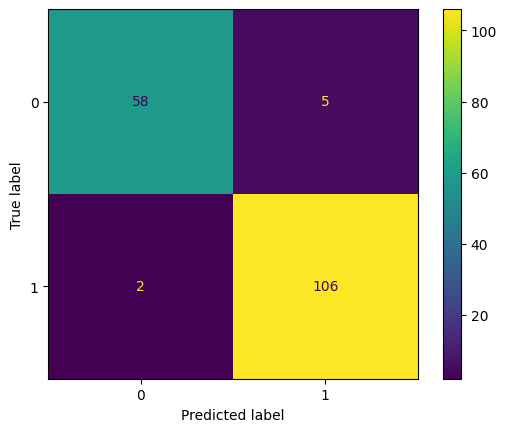

In [7]:
# a função confusion matrix retorna uma matriz com a contagem de como cada 
# uma das classes está sendo classificada corretamente ou erroneamente
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
print(cm)

print(f"\n Labels:{model.classes_} \n")

#display_labels - define como será a ordem das classes na matriz
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp_cm.plot()

### ROC Curve

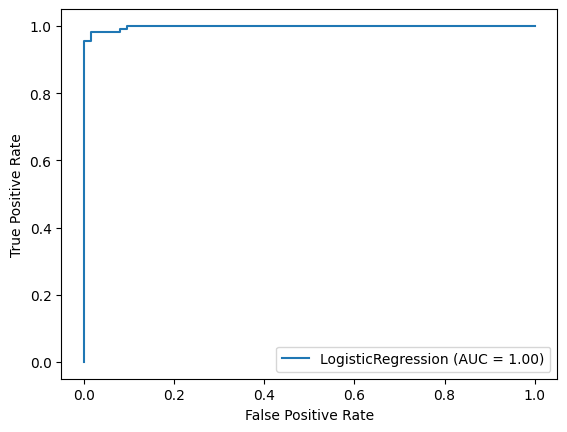

In [8]:
# É necessário os scores
y_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])
#Área sob a curva ROC (AUC)
roc_auc = auc(fpr, tpr)
disp_roc_curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name=model.__class__.__name__)
disp_roc_curve.plot()

## Validação cruzada

### HOLD-OUT

Uma pequena fração do dataset é separada para teste e outra para treino. A fração de treino pode ser dividida subsequentemente em quaisquer outros subconjuntos, o importante é garantir que o dataset de teste não é utilizado durante treino, otimização ou concepção do modelo.

In [9]:
def test_model(X_train, X_test, y_train, y_test, model_class=LogisticRegression):
    model = model_class(random_state=199)
    model.fit(X_train, y_train)

    #predição
    y_pred = model.predict(X_test)
        
    return accuracy_score(y_test,y_pred)

Um simples hold-out depende bastante da seleção inicial.

In [10]:
#random_state deve estar entre 0 e 2**32 - 1
random_state = 199
print("\n Random state: %d" % random_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)
print(f" Acurácia: %.3f" % (test_model(X_train, X_test, y_train, y_test)))

random_state = 200
print("\n Random state: %d" % random_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)
print(f" Acurácia: %.3f" % (test_model(X_train, X_test, y_train, y_test)))

random_state = 201
print("\n Random state: %d" % random_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)
print(f" Acurácia: %.3f" % (test_model(X_train, X_test, y_train, y_test)))

#Aleatório
print("\n Aleatório")
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(f" Acurácia: %.3f" % (test_model(X_train, X_test, y_train, y_test)))


 Random state: 199
 Acurácia: 0.944

 Random state: 200
 Acurácia: 0.916

 Random state: 201
 Acurácia: 0.965

 Aleatório
 Acurácia: 0.944


Podemos adicionar repetição e realizar vários hold-outs para avaliar várias vezes a performance de um algoritmo.

In [11]:
def hold_out():
  accuracies_list = []
  for i in range(0, 30):
      
      X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=199+i) 
      accuracies_list.append(test_model(X_train, X_test, y_train, y_test))

  accuracies = np.array(accuracies_list)
  print("Min: %.3f Max: %.3f" %(accuracies.min(), accuracies.max()))
  print("Hold-out: %.3f +- (%.3f)" %(accuracies.mean(), accuracies.std()))

hold_out()

Min: 0.909 Max: 0.979
Hold-out: 0.943 +- (0.018)


Outro parâmetro importante na função _train_test_split_ é o _stratify_. Ele controla se a proporção das classes no dataset de treino e teste deve ser mantida e tenta selecionar as instâncias que estão faltando para se aproximar da distribuição original.

In [12]:
def print_distribution(arr, print_nl=True):
    arr = np.unique(arr, return_counts=True)[1] / arr.count()
    for i in range(arr.shape[0]):
        print("Classe %d: %.2f%%" %(i, arr[i]*100))

    if print_nl:
        print("\n")

_, _, y_train, _ = train_test_split(X, y, test_size=0.3, random_state=199)
_, _, y_train_strat, _ = train_test_split(X, y, test_size=0.3, random_state=199, stratify=y)

print("Proporções por classe no dataset em geral:")
print_distribution(y)

print("Proporções por classe no dataset de treino sem estratificação:")
print_distribution(y_train)

print("Proporções por classe no dataset de treino com estratificação:")
print_distribution(y_train_strat, print_nl=False)

Proporções por classe no dataset em geral:
Classe 0: 37.26%
Classe 1: 62.74%


Proporções por classe no dataset de treino sem estratificação:
Classe 0: 34.92%
Classe 1: 65.08%


Proporções por classe no dataset de treino com estratificação:
Classe 0: 37.19%
Classe 1: 62.81%


### LEAVE-ONE-OUT

Fornece índices de treinamento/teste para dividir os dados em conjuntos de treinamento/teste.

Cada amostra é usada uma vez como um conjunto de teste (singleton) enquanto as amostras restantes formam o conjunto de treinamento. [Link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html)

In [13]:
def loo(loo):
    y_true, y_pred = list(), list()
    for train_index, test_index in loo.split(X):
          X_train, X_test = X.iloc[train_index], X.iloc[test_index]
          y_train, y_test = y.iloc[train_index], y.iloc[test_index]
          model = LogisticRegression(random_state=199)
          model.fit(X_train, y_train)
          pred = model.predict(X_test)
          y_true.append(y_test)
          y_pred.append(pred[0])
          
    print("Leave-One-Out: %.3f" %(accuracy_score(y_true, y_pred)))
loo(LeaveOneOut())

Leave-One-Out: 0.946


### K-FOLD

Fornece índices de treinamento/teste para dividir dados em conjuntos de treinamento/teste. 

Divide o conjunto de dados em k folds consecutivos (sem embaralhar "***shuffle***" por padrão)

In [14]:
def evaluate_model_with_kfold(kf):
    accuracies_list = []
    fold = 0
    for train, test in kf.split(X, y):
        
        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]

        model = LogisticRegression(random_state=199)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        print("Fold %d: %.3f" %(fold, accuracy_score(y_test, y_pred)))
        
        accuracies_list.append(accuracy_score(y_test, y_pred))
        fold += 1

    accuracies = np.array(accuracies_list)
    print("\nAcurácia média (desvio): %.3f +- (%.3f)" %(accuracies.mean(), accuracies.std()))

# n_splits deve ser pelo menos 2
evaluate_model_with_kfold(KFold(n_splits=5))

Fold 0: 0.912
Fold 1: 0.947
Fold 2: 0.974
Fold 3: 0.947
Fold 4: 0.956

Acurácia média (desvio): 0.947 +- (0.020)


Observe que o _k-Fold_ cria as partições sequencialmente, o que pode interferir na distribuição das classes devido a alguma ordenação no dataset. Use o parâmetro _shuffle_ para controlar a permutação do dataset antes de realizar o particionamento. E como no _hold-out_, a subdivisão aleatórias com _k-Fold_ e _shuffle_ também interfere na distribuição das classes.

In [15]:
print("Proporções por classe no dataset em geral:")
print_distribution(y)

kf = KFold(n_splits=3)
start_print = False
fold = 0
for train, test in kf.split(X, y):
    print("Fold %d" %(fold))
    print_distribution(y[train], print_nl=(fold != 2))
    fold += 1

Proporções por classe no dataset em geral:
Classe 0: 37.26%
Classe 1: 62.74%


Fold 0
Classe 0: 30.34%
Classe 1: 69.66%


Fold 1
Classe 0: 36.94%
Classe 1: 63.06%


Fold 2
Classe 0: 44.47%
Classe 1: 55.53%


Para resolver isso, _StratifiedKFold_ realiza a estratificação das classes. Outras formas de seleção estão disponíveis [aqui](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection).

In [16]:
print("Proporções por classe no dataset em geral:")
print_distribution(y)

kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=199)
fold = 0
for train, test in kf.split(X, y):
    print("Fold %d" %(fold))
    print_distribution(y[train], print_nl=(fold != 2))
    fold += 1

Proporções por classe no dataset em geral:
Classe 0: 37.26%
Classe 1: 62.74%


Fold 0
Classe 0: 37.20%
Classe 1: 62.80%


Fold 1
Classe 0: 37.20%
Classe 1: 62.80%


Fold 2
Classe 0: 37.37%
Classe 1: 62.63%


In [17]:
evaluate_model_with_kfold(StratifiedKFold(n_splits=5, shuffle=True, random_state=199))

Fold 0: 0.947
Fold 1: 0.956
Fold 2: 0.947
Fold 3: 0.921
Fold 4: 0.956

Acurácia média (desvio): 0.946 +- (0.013)
